In [20]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from modules.metrics import divergence_plot

In [21]:
def global_stats(data):

    n_trials = len(data)

    print(f"Dataset: {data[0]['dataset']}")
    print(f"Model Accuracy: {data[0]['mlp_accuracy']:.3f}")
    print("______________________________________________")

    stats = {
        'no_avg': [],
        'method_avg': [],
        'lime_avg': [],
        'shap_avg': [],
    }

    for trial in data:
        
        for key in stats:
            
            stats[key].append(trial[key])

    stats = {key: np.array(vals) for key, vals in stats.items()}

    for key, vals in stats.items():
        
        print(f"{key:>15} | mean = {np.nanmean(vals):.4f} | std = {np.nanstd(vals, ddof=1):.4f}")

In [26]:
def div_plot(data):
    
    method_avg = np.array([trial['method_avg'] for trial in data], dtype = float)
    lime_avg = np.array([trial['lime_avg'] for trial in data], dtype = float)
    shap_avg = np.array([trial['shap_avg'] for trial in data], dtype = float)


    df = pd.DataFrame({
        "Trial": np.tile(np.arange(len(method_avg)), 3),
        "JS Divergence": np.concatenate([method_avg, lime_avg, shap_avg]),
        "Method": ["Estimated MB"] * len(method_avg) + ["LIME"] * len(lime_avg) + ["SHAP"] * len(shap_avg)
    })

    fig = px.scatter(
        df,
        x = "Trial",
        y = "JS Divergence",
        color = "Method",
        title = "Jensen–Shannon Divergence per Trial",
        color_discrete_map = {
            "Estimated MB": "#0437F2",
            "LIME": "#32CD32",
            "SHAP": "#FF0000"
        }
    )
    
    fig.update_traces(marker = dict(size = 10, opacity = 0.8, line = dict(width = 1, color = 'black')))
    fig.update_layout(template = "plotly_white", font = dict(size = 14))
    fig.show()

Dataset: nursery
Model Accuracy: 0.903
______________________________________________
         no_avg | mean = 0.4077 | std = 0.1365
     method_avg | mean = 0.0062 | std = 0.0157
       lime_avg | mean = 0.0160 | std = 0.0450
       shap_avg | mean = 0.0066 | std = 0.0176


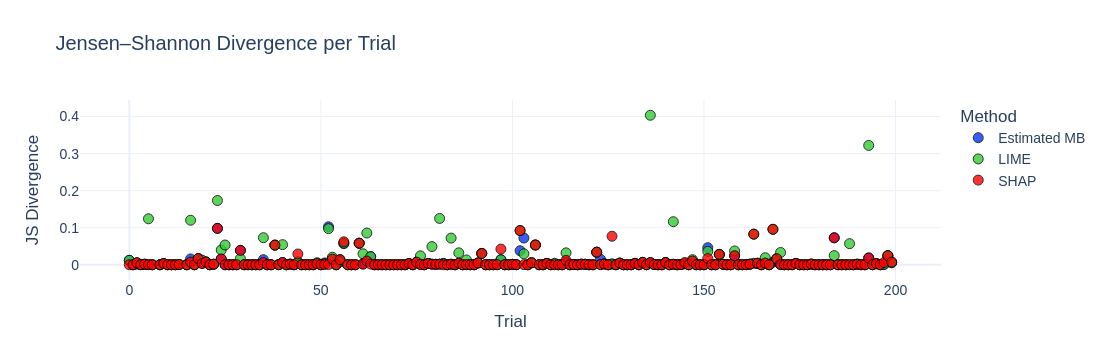

Dataset: tic_tac_toe
Model Accuracy: 0.911
______________________________________________
         no_avg | mean = 0.2877 | std = 0.1245
     method_avg | mean = 0.0461 | std = 0.1125
       lime_avg | mean = 0.0878 | std = 0.1622
       shap_avg | mean = 0.0341 | std = 0.0924


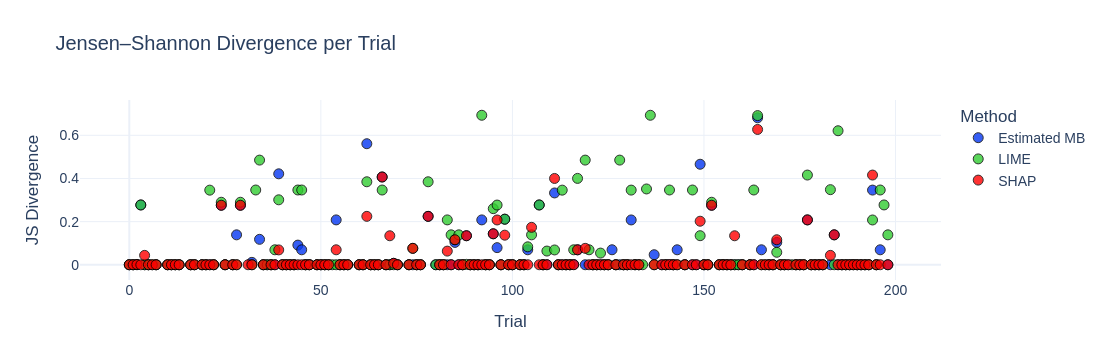

In [27]:
datasets = ['nursery', 'tic_tac_toe']

for name in datasets:
    
    data = json.load(open(f"./data/results/{name}.json"))
    global_stats(data)
    div_plot(data)